# Kaggle uploading (not required)


In [0]:
from google.colab import files
files.upload()

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle datasets download --force jangedoo/utkface-new -p /content/gdrive/My\ Drive/kaggle/age_sex_detection

Creating train and data set


In [0]:
import os
os.chdir('gdrive/My Drive/kaggle/age_sex_detection')  #change dir
!mkdir train  #create a directory named train/
!mkdir test  #create a directory named test/


In [0]:
!unzip -q utkface-new.zip 'utkface_aligned_cropped/UTKFace/*' 

In [0]:
!pwd

In [0]:
os.chdir('UTKFace')

In [0]:
import os
onlyfiles = os.listdir('.../gdrive/My Drive/kaggle/age_sex_detection')

In [0]:
len(onlyfiles)

# First stuff to do

Importing libraries

In [0]:
import tensorflow as tf
from google.colab import drive
from keras import layers
from keras import Input
from keras.models import Model
from keras.models import load_model
import os
import pandas as pd
import random
import numpy as np
from keras.preprocessing import image

Using TensorFlow backend.


In [0]:
way = '/content/gdrive/My Drive/kaggle/age_sex_detection/utkface_aligned_cropped/'

Mounting in drive

In [0]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!pwd
os.chdir(way + 'UTKFace')

/content/gdrive/My Drive/kaggle/age_sex_detection/utkface_aligned_cropped/UTKFace


If you upload already existing arrays you don't need to run the code below

In [0]:
files = os.listdir()
print(len(files))

23708


Checking if there are other files

In [0]:
files[1000]
for i in files:
  if i[-3:] != 'jpg':
    print(i)

# Data preparation (better to upload already prepared numpy arrays --> Data upload)

In [0]:
from PIL import Image
import random
import cv2
from scipy import misc
import imageio
import numpy as np
import keras

In [0]:
files = os.listdir()

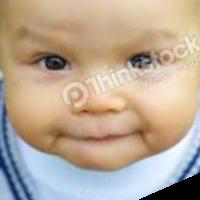

In [0]:
im =Image.open('1_0_0_20161219140623097.jpg.chip.jpg')
im

In [0]:
len(files)

23708

In [0]:
random.Random(4).shuffle(files)

**Cleaning images dataset**

In [0]:
for file in files:
  if (file[-3:]) != 'jpg':
    print(file)
!pwd
print(len(files))

/content/gdrive/My Drive/kaggle/age_sex_detection/utkface_aligned_cropped/UTKFace
23708


In [0]:
X_data = []
i_counter = 0
j_counter = 0
for file in files:
  if (file[-3:] == 'jpg'):
    face = imageio.imread(file)
    face = cv2.resize(face, (128, 128) )
    X_data.append(face)
    i_counter += 1
  #print(i_counter)
  if (i_counter // 100 != 0):
    j_counter += 1
    print (str(j_counter) + " out of 237")
    i_counter -= 100

1 out of 237
2 out of 237
3 out of 237
4 out of 237
5 out of 237
6 out of 237
7 out of 237
8 out of 237
9 out of 237
10 out of 237
11 out of 237
12 out of 237
13 out of 237
14 out of 237
15 out of 237
16 out of 237
17 out of 237
18 out of 237
19 out of 237
20 out of 237
21 out of 237
22 out of 237
23 out of 237
24 out of 237
25 out of 237
26 out of 237
27 out of 237
28 out of 237
29 out of 237
30 out of 237
31 out of 237
32 out of 237
33 out of 237
34 out of 237
35 out of 237
36 out of 237
37 out of 237
38 out of 237
39 out of 237
40 out of 237
41 out of 237
42 out of 237
43 out of 237
44 out of 237
45 out of 237
46 out of 237
47 out of 237
48 out of 237
49 out of 237
50 out of 237
51 out of 237
52 out of 237
53 out of 237
54 out of 237
55 out of 237
56 out of 237
57 out of 237
58 out of 237
59 out of 237
60 out of 237
61 out of 237
62 out of 237
63 out of 237
64 out of 237
65 out of 237
66 out of 237
67 out of 237
68 out of 237
69 out of 237
70 out of 237
71 out of 237
72 out of 237
7

In [0]:
X = np.squeeze(X_data)

In [0]:
X = np.load(way + 'Numpy_data/' + 'Images_data_prepared_128_128.npy')
Y_age = np.load(way + 'Numpy_data/' + 'Target_age_prepared_128_128.npy')
Y_gender = np.load(way + 'Numpy_data/' + 'Target_gender_prepared_128_128.npy')

In [0]:
X.shape

(23708, 128, 128, 3)

In [0]:
X = X.astype('float32')
X /= 255

**Images of size 128 x 128 are prepared and saved**

In [0]:
np.save(way + 'Numpy_data/' + 'Images_data_prepared_128_128.npy', X)

In [0]:
np.save(way + 'Numpy_data/' + 'Target_age_prepared_128_128.npy', Y_age)

In [0]:
np.save(way + 'Numpy_data/' + 'Target_gender_prepared_128_128.npy', Y_gender)

In [0]:
X = np.load(way + 'Numpy_data/' + 'Images_data_prepared_128_128.npy')
Y_age = np.load(way + 'Numpy_data/' + 'Target_age_prepared_128_128.npy')
Y_gender = np.load(way + 'Numpy_data/' + 'Target_gender_prepared_128_128.npy')

**Saving and loading X array for easiest initialisation**

In [0]:
X = np.array(X)
np.save('Images_data_prepared', X)

In [0]:
loaded_array_X = np.load('Images_data_prepared.npy')
X = loaded_array_X

**Preparing gender target data**

In [0]:
gender_targets = [int(i.split('_')[1]) for i in files]

In [0]:
#from keras.utils.np_utils import to_categorical
#Y_gender = to_categorical(gender_targets, num_classes=2)
Y_gender = gender_targets

In [0]:
Y_gender[:10]

[0, 0, 1, 0, 1, 1, 0, 1, 1, 1]

**Saving and loading Y_gender**

In [0]:
np.save('Target_gender_prepared',np.array(Y_gender))


In [0]:
loaded_array_y_gender = np.load('Target_gender_prepared.npy')
Y_gender = loaded_array_y_gender

**Preparing age target data**

In [0]:
age_targets = [int(i.split('_')[0]) for i in files]

In [0]:
age_min = min(age_targets)
age_max = max(age_targets)
print(age_min, age_max)

1 116


In [0]:
Y_age = [(i - min(age_targets)) / (max(age_targets) - min(age_targets)) for i in age_targets]

In [0]:
Y_age[:10]

[0.0,
 0.21739130434782608,
 0.17391304347826086,
 0.5826086956521739,
 0.26956521739130435,
 0.3391304347826087,
 0.3130434782608696,
 0.20869565217391303,
 0.008695652173913044,
 0.21739130434782608]

**Saving and loading Y_age**

In [0]:
np.save('Target_age_prepared',np.array(Y_age))

In [0]:
loaded_array_y_age = np.load('Target_age_prepared.npy')
Y_age = loaded_array_y_age

**Train, Validation and Test data**

In [0]:
size_train = int(0.6 * X.shape[0])
print(size_train)

14224


In [0]:
x_train, y_age_train, y_gender_train = np.array(X[:size_train]), np.array(Y_age[:size_train]), np.array(Y_gender[:size_train])
x_test, y_age_test, y_gender_test = np.array(X[size_train:]), np.array(Y_age[size_train:]), np.array(Y_gender[size_train:])
x_valid, y_age_valid, y_gender_valid = np.array(x_test[:7000]), np.array(y_age_test[:7000]), np.array(y_gender_test[:7000])
x_test, y_age_test, y_gender_test = np.array(x_test[7000:]), np.array(y_age_test[7000:]), np.array(y_gender_test[7000:])

# Data upload

Uploading numpy arrays for Data Augmentation

In [0]:
def upload(way, end = '_128_128'):
  X = np.load(way + 'Numpy_data/' + 'Images_data_prepared' + end + '.npy')
  Y_age = np.load(way + 'Numpy_data/' + 'Target_age_prepared' + end + '.npy')
  Y_gender = np.load(way + 'Numpy_data/' + 'Target_gender_prepared' + end + '.npy')
  return X, Y_age, Y_gender

Dividing dataset on train, validation and test dataset

In [0]:
def divide_dataset_tr_val_test(X, Y_age, Y_gender, percent=0.6):
  size_train = int(percent * X.shape[0])
  x_train, y_age_train, y_gender_train = X[:size_train], Y_age[:size_train], Y_gender[:size_train]
  x_test, y_age_test, y_gender_test = X[size_train:], Y_age[size_train:], Y_gender[size_train:]
  x_valid, y_age_valid, y_gender_valid = x_test[:7000], y_age_test[:7000], y_gender_test[:7000]
  x_test, y_age_test, y_gender_test = x_test[7000:], y_age_test[7000:], y_gender_test[7000:]
  return x_train, y_age_train, y_gender_train, x_valid, y_age_valid, y_gender_valid, x_test, y_age_test, y_gender_test

# Data augmentation

Applying data augmentation techniques





In [0]:
from keras.preprocessing import image

def train_test_datagen():
  train_datagen = image.ImageDataGenerator(
      rotation_range=15,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.2,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode = 'nearest'
  )
  test_datagen = image.ImageDataGenerator(
  )

  return train_datagen, test_datagen

Creating a general generator

In [0]:
# We suppose here that g1 and g2 have the same seed!
def join_generators(g1, g2):
  while True:
    el1 = next(g1)
    el2 = next(g2)
    yield el1[0], {'age': el1[1],'gender': el2[1]}


In [0]:
def train_valid_generator(batch_size, train_datagen, test_datagen, x_train, y_age_train, y_gender_train, x_valid, y_age_valid, y_gender_valid):
  seed = 1
  train_generator_age = train_datagen.flow(
      x_train,
      y= y_age_train,
      seed = seed,
      batch_size= batch_size
  )
  train_generator_gender = train_datagen.flow(
      x_train,
      y= y_gender_train,
      seed = seed,
      batch_size= batch_size
  )
  valid_generator_age = test_datagen.flow(
      x_valid,
      y= y_age_valid,
      seed = seed,
      batch_size= batch_size
  )
  valid_generator_gender = test_datagen.flow(
      x_valid,
      y= y_gender_valid,
      seed = seed,
      batch_size= batch_size
  )

  return train_generator_age, train_generator_gender, valid_generator_age, valid_generator_gender


Show some augmented data

In [0]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

def show_da(x_train, train_datagen):
	# load the image in numpy
	data = x_train[255] * 255
	# expand dimension to one sample
	samples = expand_dims(data, 0)
	# prepare iterator
	it = train_datagen.flow(samples, batch_size=1)
	# generate samples and plot
	for i in range(9):
		# define subplot
		pyplot.subplot(330 + 1 + i)
		# generate batch of images
		batch = it.next()
		# convert to unsigned integers for viewing
		image = batch[0].astype('uint8')
		# plot raw pixel data
		pyplot.imshow(image)
	# show the figure
	pyplot.show()

# Model creation and compilation

Implementation of repeated cnn block

In [0]:
def cnn_block(images):
  
  #images = Input(shape=(128,128,3,))

  x = layers.Conv2D(filters=128, kernel_size=3, padding='same', input_shape=(128,128,3))(images)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x) 
  x = layers.MaxPooling2D(pool_size= (2, 2))(x)

  x = layers.Conv2D(filters=64, kernel_size=3, padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)
  x = layers.MaxPooling2D(pool_size= (2, 2))(x)

  x = layers.Conv2D(filters=32, kernel_size=3, padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)
  x = layers.MaxPooling2D(pool_size= (2, 2))(x)

  x = layers.Conv2D(filters=32, kernel_size=3, padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)
  x = layers.MaxPooling2D(pool_size= (2, 2))(x)

  x = layers.Flatten()(x)
  x = layers.Dropout(0.6)(x)
  x = layers.Dense(512)(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation('relu')(x)

  return x

Multi output model

In [0]:
def neural_network_compiled(optimizer, show = True):
  
  images = Input(shape=(128,128,3,))

  res = cnn_block(images)

  age_prediction = layers.Dense(1, name = 'age')(res) #

  gender_prediction = layers.Dense(1, activation='sigmoid', name = 'gender')(res) #

  model = Model(images,
                [age_prediction, gender_prediction])
  if show: model.summary()

  model.compile(optimizer=optimizer,
              loss={'age': 'mse', 'gender': 'binary_crossentropy'},
              loss_weights={'age': 2., 'gender': 1.},
              metrics={'age': 'mae', 'gender': 'accuracy'}) 
  
  return model

Two separated neural networks

In [0]:
def neural_network_age(optimizer, show= True):

  images = Input(shape=(128,128,3,))

  res = cnn_block(images)

  age_prediction = layers.Dense(1)(res)

  model = Model(images,
                age_prediction)
  
  if show: model.summary()

  model.compile(optimizer=optimizer,
              loss= 'mse',
              metrics= ['mae']) 
  
  return model



def neural_network_gender(optimizer, show= True):

  images = Input(shape=(128,128,3,))

  res = cnn_block(images)

  gender_prediction = layers.Dense(1, activation='sigmoid')(res)

  model = Model(images,
                gender_prediction)
  
  if show: model.summary()

  model.compile(optimizer=optimizer,
              loss= 'binary_crossentropy',
              metrics= ['accuracy']) 
  
  return model
  




# Fitting and evaluation (normal data)

Model Fitting

In [0]:
#For multi output nn
from keras.callbacks import ModelCheckpoint
def fitting_without_da(model, name, epochs, batch_size, x_train, y_age_train, y_gender_train, x_valid, y_age_valid, y_gender_valid):
  callback= ModelCheckpoint('best_' + name, monitor='val_loss', mode='min', save_best_only=True, verbose= 1)
  history = model.fit(x_train, {"age": y_age_train, "gender": y_gender_train},
            validation_data = (x_valid,
                              {"age": y_age_valid, "gender": y_gender_valid}),
            epochs=epochs, 
            batch_size=batch_size,
            callbacks= [callback])
  
  return history

#For separated nn

def fitting_without_da_small(model, name, epochs, batch_size, x_train, Y, x_valid, Y_valid):
  callback= ModelCheckpoint('best_' + name, monitor='val_loss', mode='min', save_best_only=True, verbose= 1)
  history = model.fit(x_train, Y,
            validation_data = (x_valid,
                              Y_valid),
            epochs=epochs, 
            batch_size=batch_size,
            callbacks= [callback])
  
  return history

Model evaluation

In [0]:
#For multi output nn

def evaluation(model, name, x_test, y_age_test, y_gender_test):
  score = model.evaluate(x_test, {'age': y_age_test, 'gender': y_gender_test}, verbose=0)
  print("Score of " + name)
  print(score[0],' - test_loss') 
  print(score[1], ' - test_age_loss') 
  print(score[2],' - test_gender_loss') 
  print(score[3],' - test_age_mean_absolute_error') 
  print(score[-1],' - test_gender_acc')
  print()

#For separated nn

def evaluation_small(model, name, x_test, Y_test):
  score = model.evaluate(x_test, Y_test, verbose=0)
  print("Score of " + name)
  print(score)
  #what can i print here?

  print()

# Fitting and evaluation (augmented data)

Fitting generator

In [0]:
#multi output model and separated model
from keras.callbacks import ModelCheckpoint
def fitting_with_da(model, name, epochs, steps_per_epoch, validation_steps, train_generator, valid_generator):
  name = 'best_' + name
  callback = ModelCheckpoint(name, monitor='val_loss', mode='min', save_best_only=True, verbose= 1)
  history_generator = model.fit_generator(train_generator,
                                          epochs=epochs,
                                          validation_data= valid_generator,
                                          steps_per_epoch= steps_per_epoch,
                                          validation_steps = validation_steps,
                                          callbacks= [callback]
                                          )
  
  return history_generator



# Loss and accuracy

Plotting function

In [0]:
import matplotlib.pyplot as plt

def draw_loss_accuracy(history, name):
  print()
  print(name)
  print()
  age_loss = history.history['age_loss']
  val_age_loss = history.history['val_age_loss']

  gender_loss = history.history['gender_loss']
  val_gender_loss = history.history['val_gender_loss']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  acc_gender = history.history['gender_acc']
  val_acc_gender = history.history['val_gender_acc']

  mae_age = history.history['age_mean_absolute_error']
  val_mae_age = history.history['val_age_mean_absolute_error']

  epochs = range(1, len(age_loss) + 1)

  plt.plot(epochs, loss, 'bo', label= 'Training loss')
  plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.figure()

  plt.plot(epochs, mae_age, 'bo', label= 'Age training mae')
  plt.plot(epochs, val_mae_age, 'b', label= 'Age validation mae')
  plt.title('Training and validation age mae')
  plt.legend()

  plt.figure()

  plt.plot(epochs, acc_gender, 'bo', label= 'Gender training accurancy')
  plt.plot(epochs, val_acc_gender, 'b', label= 'Gender validation accurancy')
  plt.title('Training and validation gender accurancy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, gender_loss, 'bo', label= 'Gender training loss')
  plt.plot(epochs, val_gender_loss, 'b', label= 'Gender validation loss')
  plt.title('Training and validation gender loss')
  plt.legend()

  plt.show()

def draw_loss_age(history, name):
  print()
  print(name)
  print()

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  mae_age = history.history['mean_absolute_error']
  val_mae_age = history.history['val_mean_absolute_error']

  epochs = range(1, len(loss) + 1)

  plt.plot(epochs, loss, 'bo', label= 'Training loss')
  plt.plot(epochs, val_loss, 'b', label= 'Validation loss')
  plt.title('Training and validation age loss')
  plt.legend()

  plt.figure()

  plt.plot(epochs, mae_age, 'bo', label= 'Age training mae')
  plt.plot(epochs, val_mae_age, 'b', label= 'Age validation mae')
  plt.title('Training and validation age mae')
  plt.legend()

  plt.figure()

  plt.show()

def draw_loss_gender(history, name):
  print()
  print(name)
  print()

  gender_loss = history.history['loss']
  val_gender_loss = history.history['val_loss']

  acc_gender = history.history['acc']
  val_acc_gender = history.history['val_acc']

  epochs = range(1, len(gender_loss) + 1)

  plt.plot(epochs, gender_loss, 'bo', label= 'Gender training loss')
  plt.plot(epochs, val_gender_loss, 'b', label= 'Gender validation loss')
  plt.title('Training and validation gender loss')
  plt.legend()

  plt.figure()

  plt.plot(epochs, acc_gender, 'bo', label= 'Gender training accurancy')
  plt.plot(epochs, val_acc_gender, 'b', label= 'Gender validation accurancy')
  plt.title('Training and validation gender accurancy')
  plt.legend()

  plt.show()


# Predictions

In [0]:
def prediction(model, name, x_test, y_age_test, y_gender_test):
  y_age_hat, y_gender_hat = model.predict(x_test)
  labels = ['M', 'F']
  # Plot a random sample, their predicted labels and ground truth
  figure = plt.figure(figsize=(20, 8))
  for i, index in enumerate(np.random.choice(x_test.shape[0], size=30, replace=False)):
      ax = figure.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
      # Display each image
      ax.imshow(np.squeeze(x_test[index]))
      predict_age = int(abs(y_age_hat[index]) * 115) + 1
      true_age = int(abs(y_age_test[index]) * 115) + 1

      predict_gender = (y_gender_hat[index])
      if (predict_gender > 0.5):
        predict_gender = 1
      else:
        predict_gender = 0
      true_gender = y_gender_test[index]

      # Set the title for each image
      ax.set_title("Gender:{} ({}) A:{} ({})".format(labels[predict_gender], 
                                    labels[true_gender],
                                    predict_age,
                                    true_age),
                                    color=("green" if predict_gender == true_gender else "red"))
  plt.show()

def prediction_age(model, name, x_test, y_age_test):
  y_age_hat = model.predict(x_test)
  # Plot a random sample, their predicted labels and ground truth
  figure = plt.figure(figsize=(20, 8))
  for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
      ax = figure.add_subplot(5, 3, i + 1, xticks=[], yticks=[])
      # Display each image
      ax.imshow(np.squeeze(x_test[index]))
      predict_age = int(abs(y_age_hat[index]) * 115) + 1
      true_age = int(abs(y_age_test[index]) * 115) + 1

      # Set the title for each image
      ax.set_title("A:{} ({})".format(predict_age,
                                    true_age),
                                    color=("green" if abs(predict_age - true_age) < 10 else "red"))
  plt.show()

def prediction_gender(model, name, x_test, y_gender_test):
  y_gender_hat = model.predict(x_test)
  labels = ['M', 'F']
  # Plot a random sample, their predicted labels and ground truth
  figure = plt.figure(figsize=(20, 8))
  for i, index in enumerate(np.random.choice(x_test.shape[0], size=30, replace=False)):
      ax = figure.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
      # Display each image
      ax.imshow(np.squeeze(x_test[index]))

      predict_gender = (y_gender_hat[index])
      if (predict_gender > 0.5):
        predict_gender = 1
      else:
        predict_gender = 0
      true_gender = y_gender_test[index]

      # Set the title for each image
      ax.set_title("Gender:{} ({})".format(labels[predict_gender], 
                                    labels[true_gender],
                                    ),
                                    color=("green" if predict_gender == true_gender else "red"))
  plt.show()


# Model without data augmentation

Data upload

In [0]:
X, Y_age, Y_gender = upload(way)
x_train, y_age_train, y_gender_train, x_valid, y_age_valid, y_gender_valid, x_test, y_age_test, y_gender_test = divide_dataset_tr_val_test(X, Y_age, Y_gender)

Initialisation

In [0]:
batch_size = 64
epochs = 90
optimizer='adam'

name_without_da = 'model-without-da-batch-before-relu-4-conv(32last)-' + str(epochs) + '-ep-' + str(batch_size) + '-bs-' + optimizer + '-no-relu-end-dense-512-dropout-0.6' +'-opt.h5'

Architecture and compilation

In [0]:
model_without_da = neural_network_compiled(optimizer)

Fitting

In [0]:
history_without_da = fitting_without_da(model_without_da, name_without_da, epochs, batch_size, x_train, y_age_train, y_gender_train, x_valid, y_age_valid, y_gender_valid)

Train on 14224 samples, validate on 7000 samples
Epoch 1/90
14224/14224 [==============================] - 22s 2ms/step - loss: 1.1102 - age_loss: 0.2913 - gender_loss: 0.5276 - age_mean_absolute_error: 0.3681 - gender_acc: 0.7380 - val_loss: 0.5294 - val_age_loss: 0.0519 - val_gender_loss: 0.4256 - val_age_mean_absolute_error: 0.1818 - val_gender_acc: 0.8083

Epoch 00001: val_loss improved from inf to 0.52943, saving model to best_model-without-da-batch-before-relu-4-conv(32last)-90-ep-64-bs-adam-no-relu-end-dense-512-dropout-0.6-opt.h5
Epoch 2/90
14224/14224 [==============================] - 18s 1ms/step - loss: 0.5048 - age_loss: 0.0376 - gender_loss: 0.4297 - age_mean_absolute_error: 0.1516 - gender_acc: 0.8022 - val_loss: 0.4416 - val_age_loss: 0.0364 - val_gender_loss: 0.3688 - val_age_mean_absolute_error: 0.1513 - val_gender_acc: 0.8366

Epoch 00002: val_loss improved from 0.52943 to 0.44162, saving model to best_model-without-da-batch-before-relu-4-conv(32last)-90-ep-64-bs-ada

Save

In [0]:
model_without_da.save(way + '/Models/' + name_without_da)

Evaluation

In [0]:
evaluation(model_without_da, name_without_da, x_test, y_age_test, y_gender_test)

Score of model-without-da-batch-before-relu-4-conv(32last)-90-ep-64-bs-adam-no-relu-end-dense-512-dropout-0.6-opt.h5
0.22266981318808984  - test_loss
0.008399416323625236  - test_age_loss
0.20587097931107365  - test_gender_loss
0.06802434248672783  - test_age_mean_absolute_error
0.9162640901771336  - test_gender_acc



In [0]:
evaluation(model_without_da, name_without_da, x_test, y_age_test, y_gender_test)

Score of model-without-da-batch-before-relu-4-conv(32last)-30-ep-64-bs-adam-no-relu-end-dense-512-dropout-0.6-opt.h5
0.2352822020697901  - test_loss
0.009020272061984608  - test_age_loss
0.2172416583687403  - test_gender_loss
0.07053126482332002  - test_age_mean_absolute_error
0.9061996778428266  - test_gender_acc



In [0]:
evaluation(model_without_da, name_without_da, x_test, y_age_test, y_gender_test)

Score of model-without-da-batch-before-relu-4-conv(32last)-30-ep-64-bs-adam-no-relu-end-dense-512-dropout-0.6-opt.h5
0.2352822020697901  - test_loss
0.009020272061984608  - test_age_loss
0.2172416583687403  - test_gender_loss
0.07053126482332002  - test_age_mean_absolute_error
0.9061996778428266  - test_gender_acc



In [0]:
evaluation(model_without_da, name_without_da, x_test, y_age_test, y_gender_test)

Score of model-without-da-batch-before-relu-4-conv(32last)-30-ep-64-bs-rmsprop-no-relu-end-dense-512-dropout-0.6-opt.h5
0.24724275808355467  - test_loss
0.010771163610288582  - test_age_loss
0.22570043097395637  - test_gender_loss
0.0807018192206028  - test_age_mean_absolute_error
0.9154589371980676  - test_gender_acc



In [0]:
evaluation(model_without_da, name_without_da, x_test, y_age_test, y_gender_test)

Score of model-without-da-batch-before-relu-4-conv(32last)-30-ep-64-bs-rmsprop-no-relu-end-dense-512-dropout-0.7-opt.h5
0.2589122951030731  - test_loss
0.012436693420276741  - test_age_loss
0.23403890766863278  - test_gender_loss
0.08517118287835145  - test_age_mean_absolute_error
0.9074074074074074  - test_gender_acc



In [0]:
evaluation(model_without_da, name_without_da, x_test, y_age_test, y_gender_test)

Score of model-without-da-batch-before-relu-4-conv(32last)-30-ep-64-bs-rmsprop-no-relu-end-dense-1024-dropout-0.4-opt.h5
0.27170883245082295  - test_loss
0.008944204494045168  - test_age_loss
0.2538204237146846  - test_gender_loss
0.0704604072223347  - test_age_mean_absolute_error
0.9025764895330113  - test_gender_acc



In [0]:
evaluation(model_without_da, name_without_da, x_test, y_age_test, y_gender_test)


Score of model-without-da-batch-before-relu-4-conv(32last)-30-ep-64-bs-rmsprop-no-relu-end-dense-512-dropout-0.3-opt.h5
0.40098085080463913  - test_loss
0.01948379349389418  - test_age_loss
0.3620132624431125  - test_gender_loss
0.11381453545629114  - test_age_mean_absolute_error
0.8953301126254354  - test_gender_acc



In [0]:
evaluation(model_without_da, name_without_da, x_test, y_age_test, y_gender_test)

Score of model-without-da-batch-before-relu-4-conv(32last)-30-ep-64-bs-rmsprop-no-relu-end-dense-512-opt.h5
0.27966580082228987  - test_loss
0.009345206550521935  - test_age_loss
0.260975388057182  - test_gender_loss
0.06943643496232332  - test_age_mean_absolute_error
0.9098228663446055  - test_gender_acc



In [0]:
evaluation(model_without_da, name_without_da, x_test, y_age_test, y_gender_test)

Score of model-without-da-batch-before-relu-4-conv(32last)-30-ep-64-bs-rmsprop-no-relu-end-dense-1024-opt.h5
0.3145283631464517  - test_loss
0.015480831062988094  - test_age_loss
0.2835667021032693  - test_gender_loss
0.09528831668474057  - test_age_mean_absolute_error
0.9033816423201139  - test_gender_acc



In [0]:
evaluation(model_without_da, name_without_da, x_test, y_age_test, y_gender_test)

Score of model-without-da-batch-before-relu-5-conv-128-2-64-2-3230-ep-64-bs-rmsprop-no-relu-end-opt.h5
0.6172631277842222  - test_loss
0.010748812684342385  - test_age_loss
0.5957654993411231  - test_gender_loss
0.07718627204017747  - test_age_mean_absolute_error
0.8425925924006291  - test_gender_acc



In [0]:
evaluation(model_without_da, name_without_da, x_test, y_age_test, y_gender_test)

Score of model-without-da-batch-before-relu-4-conv(32last)-3-conv(64)30-ep-64-bs-rmsprop-no-relu-end-opt.h5
0.39697122621843395  - test_loss
0.03917954890312396  - test_age_loss
0.31861212738038264  - test_gender_loss
0.16405847054364792  - test_age_mean_absolute_error
0.9045893718846946  - test_gender_acc



In [0]:
evaluation(model_without_da, name_without_da, x_test, y_age_test, y_gender_test)

Score of model-without-da-batch-before-relu-4-conv(32last)-30-ep-64-bs-rmsprop-no-relu-end-opt.h5
0.28650044462675056  - test_loss
0.008969684527368073  - test_age_loss
0.2685610759709384  - test_gender_loss
0.0713508350117771  - test_age_mean_absolute_error
0.9009661835748792  - test_gender_acc



In [0]:
evaluation(model_without_da, name_without_da, x_test, y_age_test, y_gender_test)

Score of model-without-da-batch-before-relu-4-conv(16last)-30-ep-64-bs-rmsprop-no-relu-end-opt.h5
0.2963335268355414  - test_loss
0.012886154637844474  - test_age_loss
0.27056121766183305  - test_gender_loss
0.07978705452356169  - test_age_mean_absolute_error
0.8989533009352507  - test_gender_acc



In [0]:
evaluation(model_without_da, name_without_da, x_test, y_age_test, y_gender_test)

Score of model-without-da-batch-before-relu-3-conv-30-ep-64-bs-rmsprop-no-relu-end-opt.h5
0.2924647397945085  - test_loss
0.010174194116883232  - test_age_loss
0.27211635181869287  - test_gender_loss
0.07372631490134579  - test_age_mean_absolute_error
0.895330112721417  - test_gender_acc



Plots


model-without-da-batch-before-relu-4-conv(32last)-30-ep-64-bs-rmsprop-no-relu-end-dense-512-dropout-0.6-opt.h5



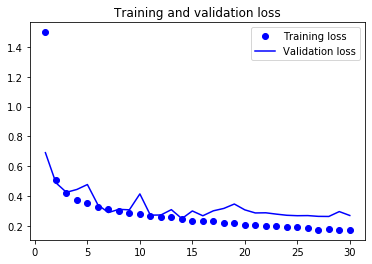

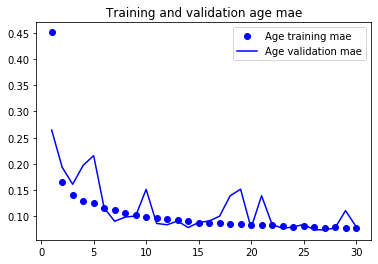

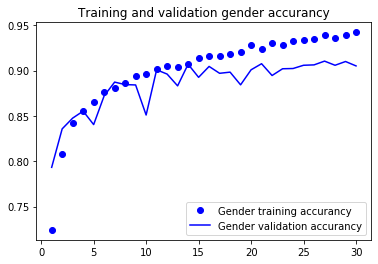

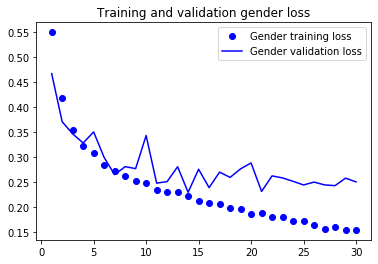

In [0]:
draw_loss_accuracy(history_without_da, name_without_da)

Prediction

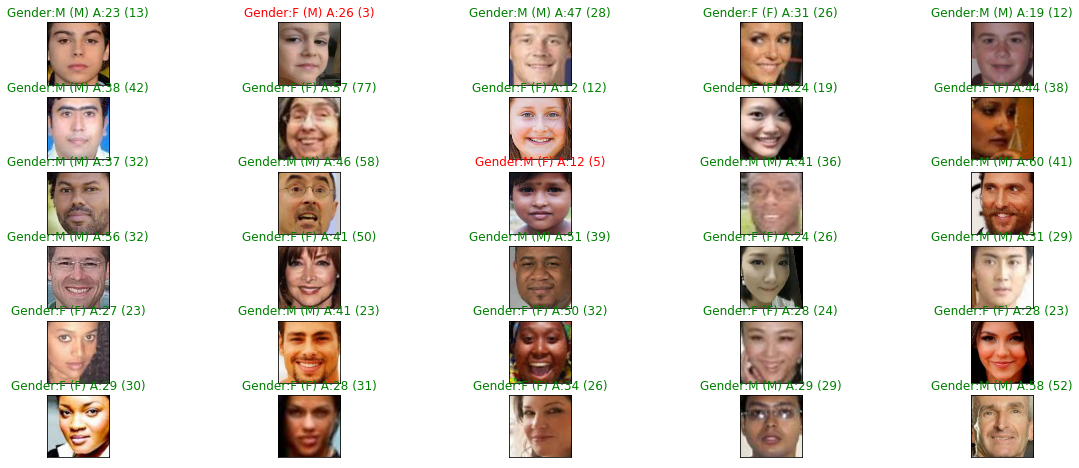

In [0]:
prediction(model_without_da, name_without_da, x_test, y_age_test, y_gender_test)

Load

In [0]:
model_without_da = load_model(way + '/Models/Data augmentation/' + 'best_' + name_without_da)

# Model with data augmentation

Data uploading

In [0]:
X, Y_age, Y_gender = upload(way)
x_train, y_age_train, y_gender_train, x_valid, y_age_valid, y_gender_valid, x_test, y_age_test, y_gender_test = divide_dataset_tr_val_test(X, Y_age, Y_gender)

Generators initialisation

In [0]:
train_datagen, test_datagen = train_test_datagen()

In [0]:
tr_1, tr_2, vl_1, vl_2 = train_valid_generator(64, train_datagen, test_datagen, x_train, y_age_train, y_gender_train, x_valid, y_age_valid, y_gender_valid)

In [0]:
train_generator, valid_generator = join_generators(tr_1, tr_2), join_generators(vl_1, vl_2)

Initialisation

In [0]:
epochs = 90
batch_size = 64
optimizer='adam'
steps_per_epoch = int(len(x_train) // batch_size * 1.5)
validation_steps = len(x_valid) // batch_size

name_da = 'model-with-da-best(without da)-' + str(epochs) + '-ep-' + str(batch_size) + '-bs-' + optimizer + '-opt-' + str(steps_per_epoch) + '-steps_p_e-' + str(validation_steps) + '-val_st.h5'

Architecture and compilation

In [0]:
model_da = neural_network_compiled(optimizer)

Fitting

In [0]:
history_da = fitting_with_da(model_da, name_da, epochs, steps_per_epoch, validation_steps, train_generator, valid_generator)

Epoch 1/90
333/333 [==============================] - 160s 480ms/step - loss: 1.1355 - age_loss: 0.2160 - gender_loss: 0.7034 - age_mean_absolute_error: 0.3047 - gender_acc: 0.5522 - val_loss: 0.6213 - val_age_loss: 0.0305 - val_gender_loss: 0.5603 - val_age_mean_absolute_error: 0.1330 - val_gender_acc: 0.7173

Epoch 00001: val_loss improved from inf to 0.62133, saving model to best_model-with-da-best(without da)-90-ep-64-bs-adam-opt-333-steps_p_e-109-val_st.h5
Epoch 2/90
333/333 [==============================] - 158s 474ms/step - loss: 0.6109 - age_loss: 0.0337 - gender_loss: 0.5436 - age_mean_absolute_error: 0.1437 - gender_acc: 0.7269 - val_loss: 0.4903 - val_age_loss: 0.0194 - val_gender_loss: 0.4516 - val_age_mean_absolute_error: 0.1030 - val_gender_acc: 0.7891

Epoch 00002: val_loss improved from 0.62133 to 0.49033, saving model to best_model-with-da-best(without da)-90-ep-64-bs-adam-opt-333-steps_p_e-109-val_st.h5
Epoch 3/90
333/333 [==============================] - 159s 478ms

Save

In [0]:
model_da.save(way + '/Models/' + name_da)

Evaluation

In [0]:
evaluation(model_da_best, 'best_' + name_da, x_test, y_age_test, y_gender_test)

Score of best_model-with-da-best(without da)-90-ep-64-bs-adam-opt-333-steps_p_e-109-val_st.h5
0.20375366760912725  - test_loss
0.008003639124765776  - test_age_loss
0.18774638870272084  - test_gender_loss
0.06726912131919953  - test_age_mean_absolute_error
0.9227053140096618  - test_gender_acc



In [0]:
evaluation(model_da, name_da, x_test, y_age_test, y_gender_test)

Score of model-with-da-best(without da)-90-ep-64-bs-adam-opt-333-steps_p_e-109-val_st.h5
0.24550760809734057  - test_loss
0.012921365454864962  - test_age_loss
0.21966487730758777  - test_gender_loss
0.08693960268236396  - test_age_mean_absolute_error
0.9049919483742276  - test_gender_acc



Plots


model-with-da-best(without da)-90-ep-64-bs-adam-opt-333-steps_p_e-109-val_st.h5



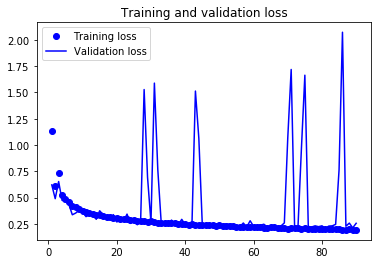

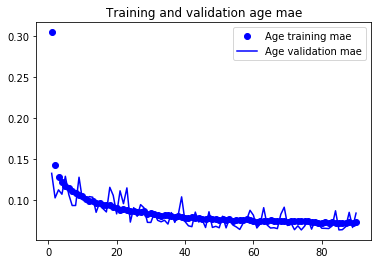

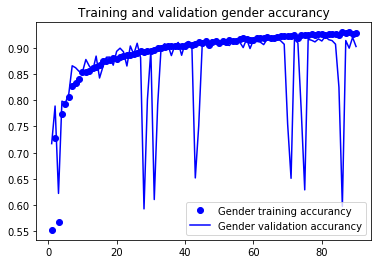

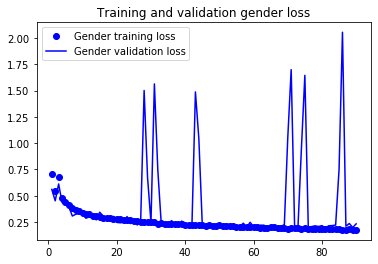

In [0]:
draw_loss_accuracy(history_da, name_da)

Prediction

In [0]:
prediction(model_da, name_da, x_test, y_age_test, y_gender_test)

Load

In [0]:
model_da_best = load_model(way + '/Models/' + 'best_' + name_da)

# Separated network age

Data upload

In [0]:
X, Y_age, Y_gender = upload(way)
x_train, y_age_train, y_gender_train, x_valid, y_age_valid, y_gender_valid, x_test, y_age_test, y_gender_test = divide_dataset_tr_val_test(X, Y_age, Y_gender)

Generators initialisation

In [0]:
train_datagen, test_datagen = train_test_datagen()

In [0]:
tr_1_age, tr_2, vl_1_age, vl_2 = train_valid_generator(64, train_datagen, test_datagen, x_train, y_age_train, y_gender_train, x_valid, y_age_valid, y_gender_valid)

Initialisation

In [0]:
epochs = 90
batch_size = 64
optimizer='adam'
steps_per_epoch = int(len(x_train) // batch_size * 1.5)
validation_steps = len(x_valid) // batch_size

name_without_da_age = 'model-separated-age-without-da-best-' + str(epochs) + '-ep-' + str(batch_size) + '-bs-' + optimizer + '-no-relu-end-dense-512-dropout-0.6' +'-opt.h5'
name_da_age = 'model-separated-age-with-da-best(without da)-' + str(epochs) + '-ep-' + str(batch_size) + '-bs-' + optimizer + '-opt-' + str(steps_per_epoch) + '-steps_p_e-' + str(validation_steps) + '-val_st.h5'

Architecture and compilation

In [0]:
model_da_age = neural_network_age(optimizer)
model_without_da_age = neural_network_age(optimizer)













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 128)     3584      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 128)     512       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 128)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        73792    

Fitting

In [0]:
history_without_da_age = fitting_without_da(model_without_da_age, name_without_da_age, epochs, batch_size, x_train, y_age_train, x_valid, y_age_valid)

In [0]:
epochs= 30

In [0]:
history_da_age = fitting_with_da(model_da_age, 'best_' + name_da_age, epochs, steps_per_epoch, validation_steps, tr_1_age, vl_1_age)

Epoch 1/30
333/333 [==============================] - 66s 198ms/step - loss: 0.0062 - mean_absolute_error: 0.0579 - val_loss: 0.0060 - val_mean_absolute_error: 0.0546

Epoch 00001: val_loss improved from inf to 0.00603, saving model to best_best_model-separated-age-with-da-best(without da)-90-ep-64-bs-adam-opt-333-steps_p_e-109-val_st.h5
Epoch 2/30
333/333 [==============================] - 62s 185ms/step - loss: 0.0062 - mean_absolute_error: 0.0576 - val_loss: 0.0230 - val_mean_absolute_error: 0.1053

Epoch 00002: val_loss did not improve from 0.00603
Epoch 3/30
333/333 [==============================] - 63s 188ms/step - loss: 0.0062 - mean_absolute_error: 0.0577 - val_loss: 0.0099 - val_mean_absolute_error: 0.0700

Epoch 00003: val_loss did not improve from 0.00603
Epoch 4/30
333/333 [==============================] - 62s 187ms/step - loss: 0.0062 - mean_absolute_error: 0.0578 - val_loss: 0.0101 - val_mean_absolute_error: 0.0707

Epoch 00004: val_loss did not improve from 0.00603
Epo

Save

In [0]:
model_da_age.save(way + '/Models/' + name_da_age)

Evaluation

In [0]:
evaluation_small(model_da_age, 'best_' + name_without_da_age, x_test, y_age_test)

Score of best_model-separated-age-without-da-best-90-ep-64-bs-adam-no-relu-end-dense-512-dropout-0.6-opt.h5
[0.005592594417366956, 0.054874839420143914]



In [0]:
evaluation(model_without_da_age, 'best_' + name_without_da_age, x_test, y_age_test)

Score of best_model-separated-age-without-da-best-30-ep-64-bs-adam-no-relu-end-dense-512-dropout-0.6-opt.h5
[0.008612494041390369, 0.07051402765915589]



Plots

In [0]:
draw_loss_age(history_da_age, name_da_age)

Prediction

In [0]:
prediction_age(model_without_da_age, 'best_' + name_without_da_age, x_test, y_age_test)

Load

In [0]:
model_da_age = load_model(way + 'Models/' + 'best_' + name_da_age)

In [0]:
model_da_age = load_model(way + '/Models/' + 'best_' + name_da_age)

In [0]:
best_model-separated-gender-with-da-best(without da)-60-ep-64-bs-adam-opt-333-steps_p_e-109-val_st

#Separated network gender

Data upload

In [0]:
X, Y_age, Y_gender = upload(way)
x_train, y_age_train, y_gender_train, x_valid, y_age_valid, y_gender_valid, x_test, y_age_test, y_gender_test = divide_dataset_tr_val_test(X, Y_age, Y_gender)

Generators initialisation

In [0]:
train_datagen, test_datagen = train_test_datagen()

In [0]:
tr_1, tr_2_gender, vl_1, vl_2_gender = train_valid_generator(64, train_datagen, test_datagen, x_train, y_age_train, y_gender_train, x_valid, y_age_valid, y_gender_valid)

Initialisation

In [0]:
epochs = 90
batch_size = 64
optimizer='adam'
steps_per_epoch = int(len(x_train) // batch_size * 1.5)
validation_steps = len(x_valid) // batch_size

name_da_gender = 'model-separated-gender-with-da-best(without da)-' + str(epochs) + '-ep-' + str(batch_size) + '-bs-' + optimizer + '-opt-' + str(steps_per_epoch) + '-steps_p_e-' + str(validation_steps) + '-val_st.h5'

Architecture and compilation

In [0]:
model_da_gender = neural_network_gender(optimizer)













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 128)     3584      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 128)     512       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 128)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        73792    

Fitting

In [0]:
history_da_gender = fitting_with_da(model_da_gender, name_da_gender, epochs, steps_per_epoch, validation_steps, tr_2_gender, vl_2_gender)



Epoch 1/90
333/333 [==============================] - 62s 185ms/step - loss: 0.5750 - acc: 0.7241 - val_loss: 0.4628 - val_acc: 0.7790

Epoch 00001: val_loss improved from inf to 0.46279, saving model to best_model-separated-gender-with-da-best(without da)-90-ep-64-bs-adam-opt-333-steps_p_e-109-val_st.h5
Epoch 2/90
333/333 [==============================] - 59s 176ms/step - loss: 0.4620 - acc: 0.7798 - val_loss: 0.4240 - val_acc: 0.8110

Epoch 00002: val_loss improved from 0.46279 to 0.42396, saving model to best_model-separated-gender-with-da-best(without da)-90-ep-64-bs-adam-opt-333-steps_p_e-109-val_st.h5
Epoch 3/90
333/333 [==============================] - 60s 181ms/step - loss: 0.4074 - acc: 0.8144 - val_loss: 0.3469 - val_acc: 0.8405

Epoch 00003: val_loss improved from 0.42396 to 0.34694, saving model to best_model-separated-gender-with-da-best(without da)-90-ep-64-bs-adam-opt-333-steps_p_e-109-val_st.h5
Epoch 4/90
333/333 [==============================] - 59s 177ms/step - l

Save

In [0]:
model_da_gender.save(way + '/Models/' + name_da_gender)

Evaluation

In [0]:
evaluation_small(model_da_gender, 'best_' + name_da_gender, x_test, y_gender_test)

Score of best_model-separated-gender-with-da-best(without da)-90-ep-64-bs-adam-opt-333-steps_p_e-109-val_st.h5
[0.1982400407699715, 0.9090177133655395]



In [0]:
evaluation_small(model_da_gender, 'best_' + name_da_gender, x_test, y_gender_test)

Score of model-separated-gender-with-da-best(without da)-60-ep-64-bs-adam-opt-333-steps_p_e-109-val_st.h5
[0.19497215984188224, 0.9182769726247987]



Plots

In [0]:
print(history_da_gender.history)

{'val_loss': [0.4627928217069818, 0.4239607967926144, 0.3469378671500372, 0.38089463503165505, 0.3884812670114269, 0.33124825231206734, 0.3137042316357845, 0.30839569208393736, 0.31533166927724837, 0.2710795153658558, 0.3022991020786721, 0.2654100307612546, 0.26486060494232616, 0.25379664835014143, 0.2568086875557487, 0.25648518042443397, 0.24308586613873434, 0.2822943587444783, 0.24058326121501306, 0.29647235022352914, 0.2250823369281927, 0.25002683298673045, 0.255641849155107, 0.2907190092569679, 0.2644175786219941, 0.24179210801713058, 0.2320357035274049, 0.2518007556769262, 0.22735830744451305, 0.2458409890790299, 0.22542089038241694, 0.23899431546426012, 0.2336744946076383, 0.23959840526492812, 0.25240786605640264, 0.22838853694060268, 0.2201741512740222, 0.22045550083756585, 0.24595248616690454, 0.21351576160807098, 0.23574950325172803, 0.2142409452311308, 0.21840200555159558, 0.2275849787868568, 0.21462286195385827, 0.21875111323876914, 0.2698296596400328, 0.21183014105073034, 0

In [0]:
draw_loss_gender(history_da_gender, name_da_gender)

Prediction

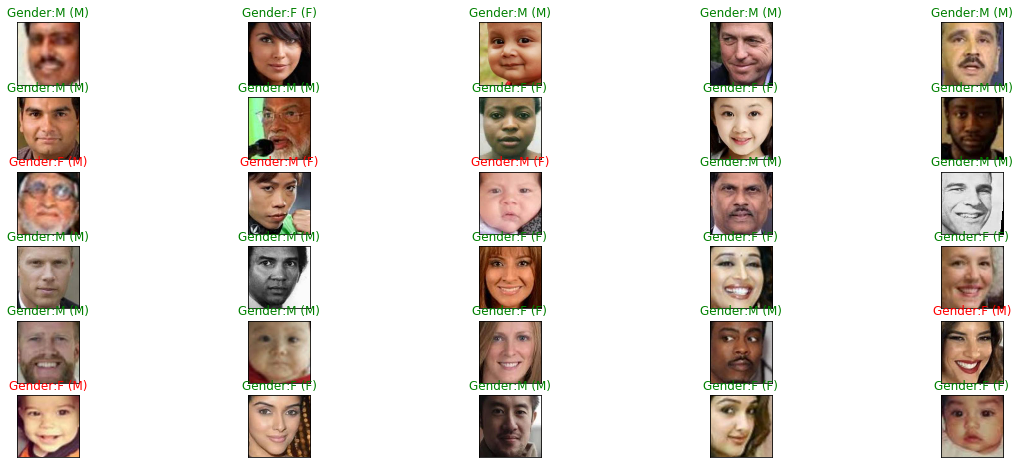

In [0]:
prediction_gender(model_da_gender, name_da_gender, x_test, y_gender_test)

Load

In [0]:
model_da_gender = load_model(way + '/Models/' + 'best_' + name_da_gender)